In [1]:
import pandas as pd
import numpy as np 
from pylab import plt
from scipy.optimize import curve_fit
df = pd.read_excel('/Users/ananth/Desktop/salinity_snowdepth.xlsx');

a = df.to_numpy()

In [2]:
df
salinity = df.Sp
snow_depth = df.Snow_depth

# plot the salinity distribution for each snow depth bin 
def func_1(x,a,b):
    return 1/(a*x+b)
def func_2(x,a):
    return a/x

popt, pconv = curve_fit(func_1,salinity,snow_depth)



Text(0, 0.5, 'Snow_depth (cm)')

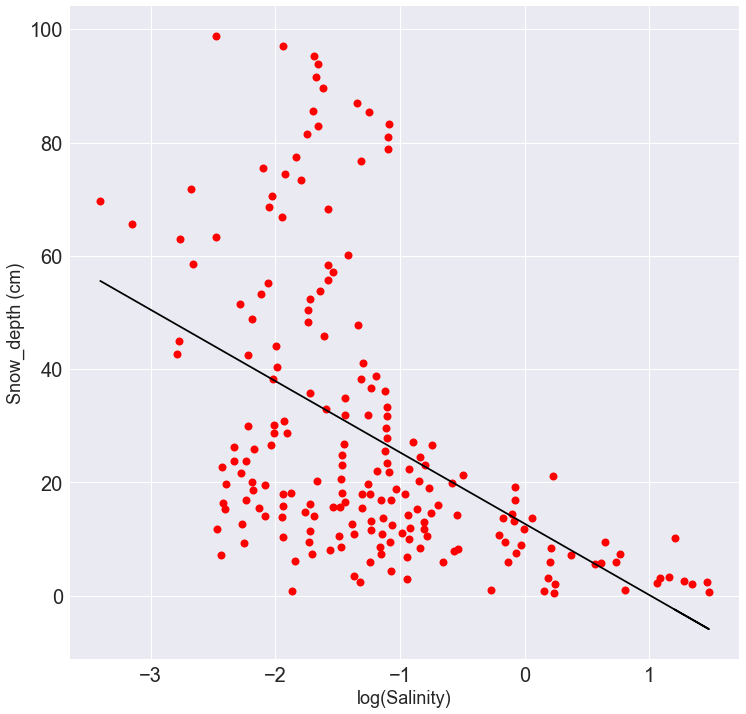

In [3]:
plt.figure(figsize=(12,12))
plt.style.use('seaborn')

sd_slice1 = snow_depth[snow_depth<20]
sd_slice2 = snow_depth[snow_depth>=20]

sp_slice1 = salinity[snow_depth<20]
sp_slice2 = salinity[snow_depth>20]

plt.plot(np.log10(salinity),snow_depth,'r.',markersize = 16)

linear_fit = np.polyfit(np.log10(salinity),snow_depth,1)
Y_fit = np.polyval(linear_fit,np.log10(salinity))
#plt.plot(np.log10(salinity),func_1(salinity,*popt),'k.')
plt.plot(np.log10(salinity),Y_fit,'k-')
#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.title('Snow depth as ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth (cm)',fontsize = 18)

Text(0.5, 1.0, 'Snow depth (Sd, cm) vs log (Salinity)')

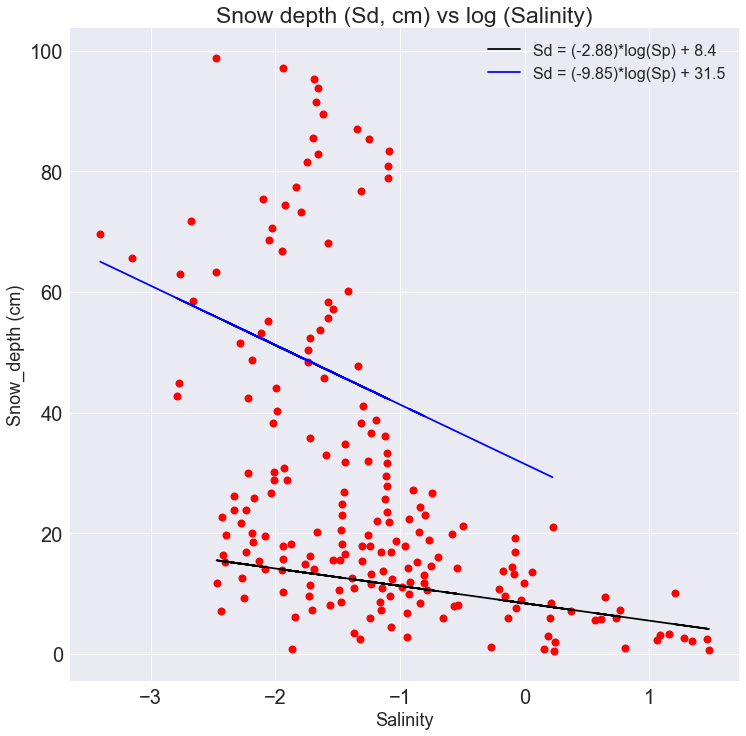

In [28]:
#code to split the above plot with a 20cm threshold for snow depth 
plt.figure(figsize=(12,12))
plt.style.use('seaborn')

cutoff = 20

sd_slice1 = snow_depth[snow_depth<cutoff]
sd_slice2 = snow_depth[snow_depth>=cutoff]

sp_slice1 = salinity[snow_depth<cutoff]
sp_slice2 = salinity[snow_depth>=cutoff]

plt.plot(np.log10(salinity),snow_depth,'r.',markersize = 16)

linear_fit_1 = np.polyfit(np.log10(sp_slice1),sd_slice1,1)
linear_fit_2 = np.polyfit(np.log10(sp_slice2),sd_slice2,1)
Y_fit_1 = np.polyval(linear_fit_1,np.log10(sp_slice1))
Y_fit_2 = np.polyval(linear_fit_2,np.log10(sp_slice2))
#plt.plot(np.log10(salinity),func_1(salinity,*popt),'k.')
label1 = f'Sp = exp((Sd-{round(linear_fit_1[1],2)})/({round(linear_fit_1[0],2)}))'
label2 = f'Sp = exp((Sd-{round(linear_fit_2[1],2)})/({round(linear_fit_2[0],2)}))'
#plt.plot(np.log10(sp_slice1),Y_fit_1,'k-', label = f'Sd = ({round(linear_fit_1[0],2)})*log(Sp) + {round(linear_fit_1[1],2)}')
#plt.plot(np.log10(sp_slice2),Y_fit_2,'b-', label = f'Sd = ({round(linear_fit_2[0],2)})*log(Sp) + {round(linear_fit_2[1],2)}')

#plt.plot(salinity, snow_depth,'b.', markersize = 16, label = 'observations')

#y1 = np.exp((snow_depth[snow_depth<20] - linear_fit_1[1])/(linear_fit_1[0]))
#y2 = np.exp((snow_depth[snow_depth>20] - linear_fit_2[1])/(linear_fit_2[0]))

#plt.plot(salinity[snow_depth<20],y1,'r--')

plt.plot(np.log10(sp_slice1),Y_fit_1,'k-', label = f'Sd = ({round(linear_fit_1[0],2)})*log(Sp) + {round(linear_fit_1[1],2)}')
plt.plot(np.log10(sp_slice2),Y_fit_2,'b-', label = f'Sd = ({round(linear_fit_2[0],2)})*log(Sp) + {round(linear_fit_2[1],2)}')

#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.xscale('log')
#plt.title('Snow depth as ',fontsize = 20)
plt.xlabel('Salinity',fontsize = 18)
plt.ylabel('Snow_depth (cm)',fontsize = 18)
plt.legend(fontsize = 16)
plt.title('Snow depth (Sd, cm) vs log (Salinity)', fontsize = 23)

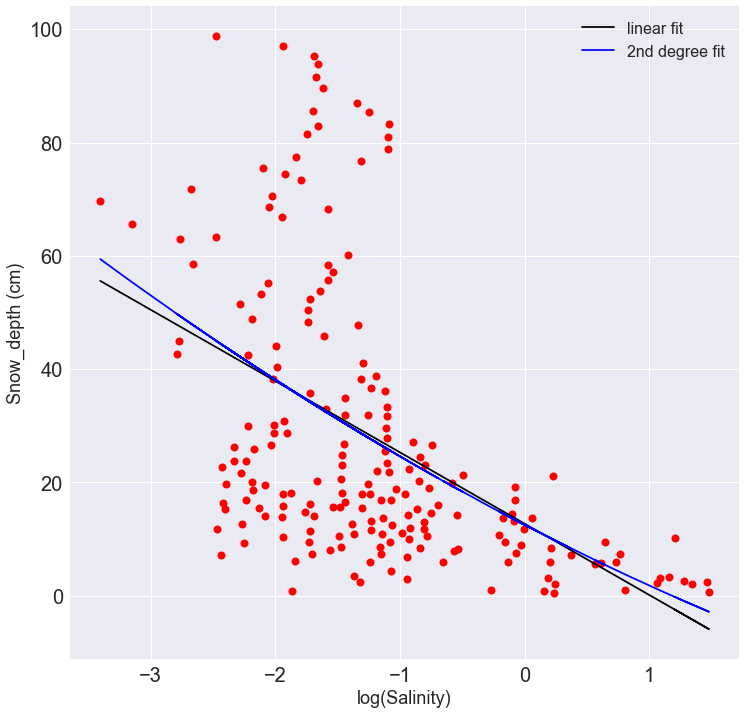

In [34]:
# try quadratic fit for the data 

plt.figure(figsize=(12,12))
plt.style.use('seaborn')

plt.plot(np.log10(salinity),snow_depth,'r.',markersize = 16)

linear_fit = np.polyfit(np.log10(salinity),snow_depth,1)
quad_fit = np.polyfit(np.log10(salinity),snow_depth,2)
Y_fit = np.polyval(linear_fit,np.log10(salinity))
Y_fit_2 = np.polyval(quad_fit,np.log10(salinity))

#plt.plot(np.log10(salinity),func_1(salinity,*popt),'k.')
plt.plot(np.log10(salinity),Y_fit,'k-', label = 'linear fit')
plt.plot(np.log10(salinity),Y_fit_2,'b-', label = '2nd degree fit')
#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.title('Snow depth as ',fontsize = 20)
plt.xlabel('log(Salinity)',fontsize = 18)
plt.ylabel('Snow_depth (cm)',fontsize = 18)
plt.legend(fontsize = 16)

In [44]:
#code to split the above plot with a 20cm threshold for snow depth 
plt.figure(figsize=(12,12))
plt.style.use('seaborn')

cutoff = 20

#salinity = salinity[salinity<1e-1]
#snow_depth = snow_depth[salinity<1e-2]

logsp = np.log10(salinity)

salinity = salinity[logsp<-1.5]
snow_depth = snow_depth[logsp<-1.5]

sd_slice1 = snow_depth[logsp>-1.5]
sd_slice2 = snow_depth[logsp<=-1.5]

logsp_slice1 = logsp[logsp>-1.5]
logsp_slice2 = logsp[logsp<=-1.5]


plt.plot(logsp,snow_depth,'r.',markersize = 16)

linear_fit_1 = np.polyfit(logsp_slice1,sd_slice1,1)
linear_fit_2 = np.polyfit(logsp_slice2,sd_slice2,1)
Y_fit_1 = np.polyval(linear_fit_1,logsp_slice1)
Y_fit_2 = np.polyval(linear_fit_2,logsp_slice2)

#plt.plot(np.log10(salinity),func_1(salinity,*popt),'k.')
label1 = f'Sp = exp((Sd-{round(linear_fit_1[1],2)})/({round(linear_fit_1[0],2)}))'
label2 = f'Sp = exp((Sd-{round(linear_fit_2[1],2)})/({round(linear_fit_2[0],2)}))'
#plt.plot(np.log10(sp_slice1),Y_fit_1,'k-', label = f'Sd = ({round(linear_fit_1[0],2)})*log(Sp) + {round(linear_fit_1[1],2)}')
#plt.plot(np.log10(sp_slice2),Y_fit_2,'b-', label = f'Sd = ({round(linear_fit_2[0],2)})*log(Sp) + {round(linear_fit_2[1],2)}')

#plt.plot(salinity, snow_depth,'b.', markersize = 16, label = 'observations')

#y1 = np.exp((snow_depth[snow_depth<20] - linear_fit_1[1])/(linear_fit_1[0]))
#y2 = np.exp((snow_depth[snow_depth>20] - linear_fit_2[1])/(linear_fit_2[0]))

#plt.plot(salinity[snow_depth<20],y1,'r--')

plt.plot(logsp_slice1,Y_fit_1,'k-', label = f'Sd = ({round(linear_fit_1[0],2)})*log(Sp) + {round(linear_fit_1[1],2)}')
plt.plot(logsp_slice2,Y_fit_2,'b-', label = f'Sd = ({round(linear_fit_2[0],2)})*log(Sp) + {round(linear_fit_2[1],2)}')

#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#plt.xscale('log')
#plt.title('Snow depth as ',fontsize = 20)
plt.xlabel('Salinity',fontsize = 18)
plt.ylabel('Snow_depth (cm)',fontsize = 18)
plt.legend(fontsize = 16)
plt.title('Snow depth (Sd, cm) vs log (Salinity)', fontsize = 23)

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 864x864 with 0 Axes>

In [ ]:
ss_1 = salinity[salinity>10]
plt.figure(figsize=(12,12))
plt.style.use('seaborn')
plt.plot(salinity,snow_depth,'r.',markersize = 16)
plt.plot(salinity,func_1(salinity,*popt),'k.')
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (cm) vs Salinity',fontsize = 20)
plt.xlabel('Salinity (psu)',fontsize = 18)
plt.ylabel('Snow_depth (cm)',fontsize = 18)

TypeError: func_2() takes 2 positional arguments but 3 were given

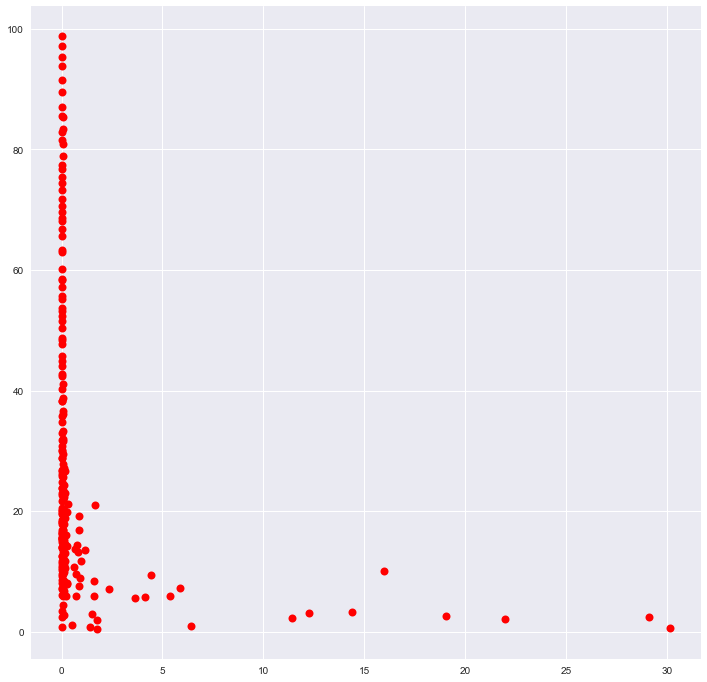

In [21]:
salinity_slice = salinity[salinity<0.1]
snow_depth_slice = snow_depth[salinity<0.1]
plt.figure(figsize=(12,12))
plt.style.use('seaborn')
plt.plot(salinity,snow_depth,'r.',markersize = 16)
plt.plot(salinity_slice,func_2(salinity_slice,*popt),'k.')
#plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Snow depth (cm) vs Salinity',fontsize = 20)
plt.xlabel('Salinity (psu)',fontsize = 18)
plt.ylabel('Snow_depth (cm)',fontsize = 18)

Text(0.5, 1.0, 'Snow depth vs salinity')

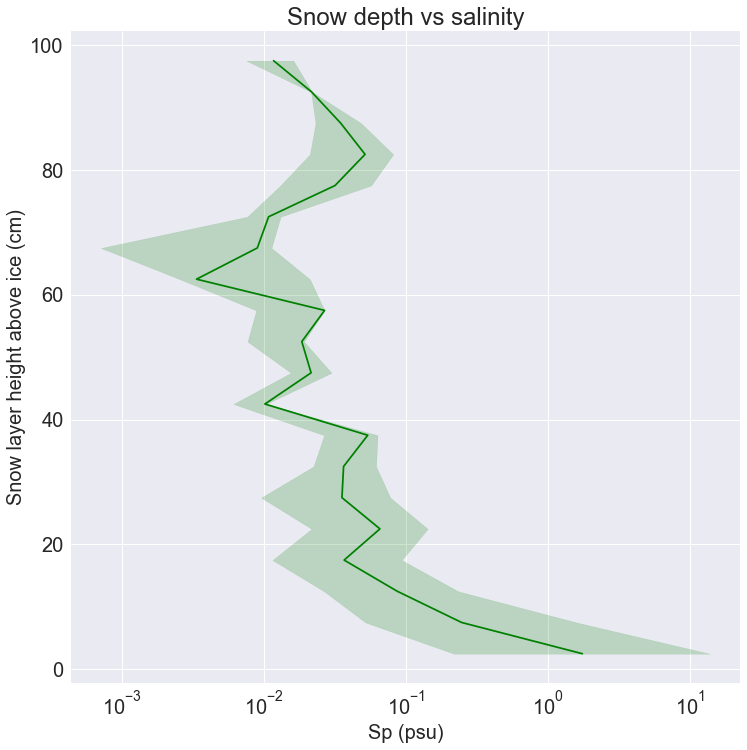

In [16]:
bins = np.arange(0,101,5);

salinity_50 = []
salinity_25 = []
salinity_75 = []
depth       = []


for i in range(len(bins)-1):
    
    cond = (snow_depth>bins[i]) & (snow_depth<bins[i+1]);
    salinity_slice = salinity[cond];
    salinity_50 = np.append(salinity_50, np.percentile(salinity_slice,50));
    salinity_25 = np.append(salinity_25, np.percentile(salinity_slice,25));
    salinity_75 = np.append(salinity_75, np.percentile(salinity_slice,75));
    depth = np.append(depth,(bins[i]+bins[i+1])/2)
    
plt.figure(figsize = (12,12))
plt.plot(salinity_50,depth,'g')
plt.fill_betweenx(depth,salinity_25,salinity_75,alpha = 0.2,color = 'g')
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sp (psu)',fontsize = 20)
plt.ylabel('Snow layer height above ice (cm)',fontsize = 20)
plt.title('Snow depth vs salinity',fontsize = 24)

In [17]:
# plot the salinity distribution for each snow depth bin 
def func_1(x,a,b):
    return 1/(a*x+b)
def func_2(x,a):
    return a/x



In [18]:
popt, pconv = curve_fit(func_1,salinity,snow_depth)
#popt, pconv = curve_fit(func_1,salinity_50,depth)

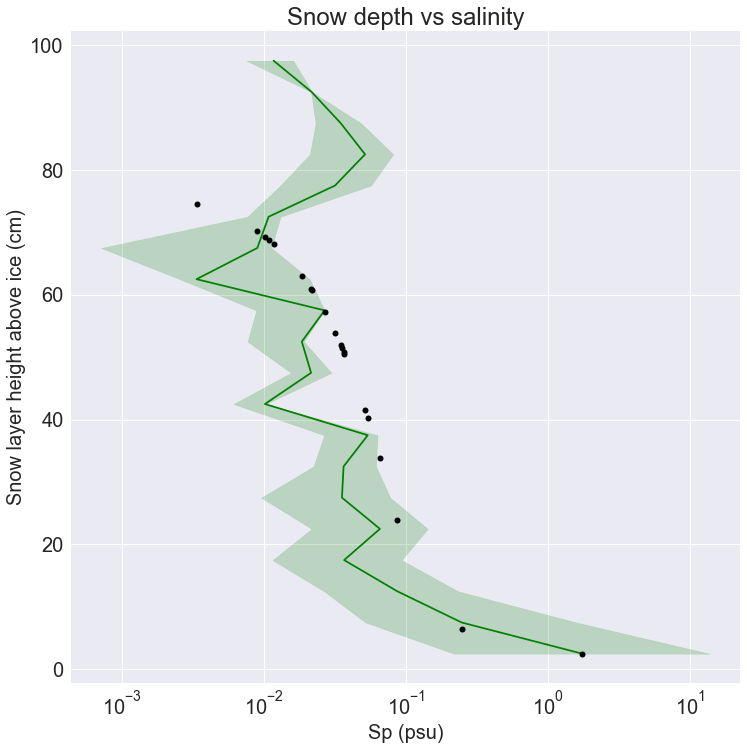

In [43]:
# fitting a polynomial function to the above curve 


parabolic_fit = np.polyfit(salinity_50,depth,3) 
#parabolic_fit = np.polyfit(salinity,snow_depth,20) 
Y_fit = np.polyval(parabolic_fit,salinity_50)

plt.figure(figsize = (12,12))
plt.plot(salinity_50,depth,'g')
plt.fill_betweenx(depth,salinity_25,salinity_75,alpha = 0.2,color = 'g')
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sp (psu)',fontsize = 20)
plt.ylabel('Snow layer height above ice (cm)',fontsize = 20)
plt.title('Snow depth vs salinity',fontsize = 24)
plt.plot(salinity_50,Y_fit,'k.',markersize = 12)
#plt.plot(salinity_50,func_1(salinity_50,*popt),'k.')
#plt.plot(xdata, func(xdata, *popt)
#plt.xlim([0,2])

#test = np.polyval(parabolic_fit,100)

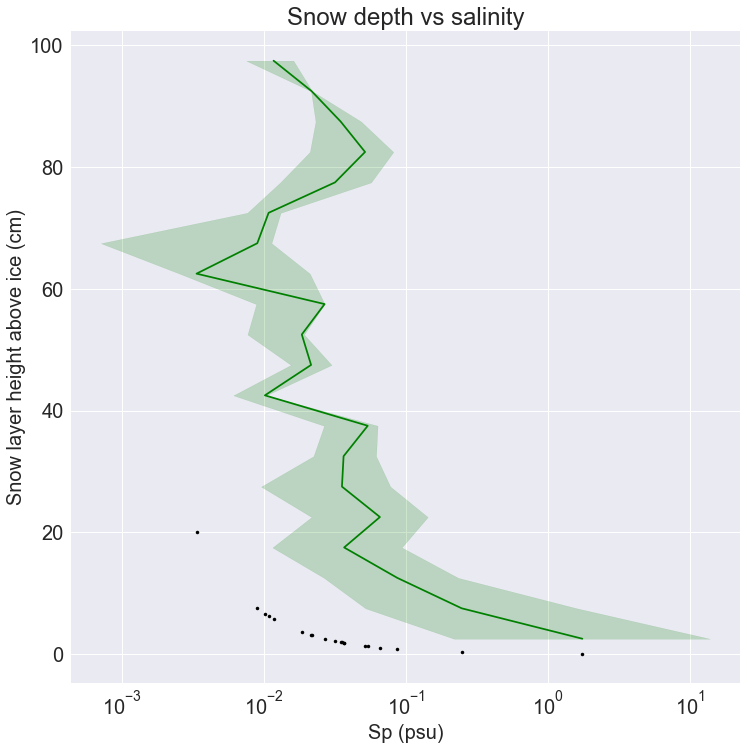

In [49]:
def func_1(x,a,b):
    return 1/(a*x+b)
def func_2(x,a):
    return a/x


popt, pconv = curve_fit(func_2,salinity,snow_depth)


parabolic_fit = np.polyfit(salinity_50,depth,3) 
#parabolic_fit = np.polyfit(salinity,snow_depth,20) 
Y_fit = np.polyval(parabolic_fit,salinity_50)



plt.figure(figsize = (12,12))
plt.plot(salinity_50,depth,'g')
plt.fill_betweenx(depth,salinity_25,salinity_75,alpha = 0.2,color = 'g')
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sp (psu)',fontsize = 20)
plt.ylabel('Snow layer height above ice (cm)',fontsize = 20)
plt.title('Snow depth vs salinity',fontsize = 24)
#plt.plot(salinity_50,Y_fit,'k.',markersize = 12)
#plt.plot(salinity,func_1(salinity,*popt),'k.')
plt.plot(salinity_50,func_2(salinity_50,*popt),'k.')
#plt.plot(xdata, func(xdata, *popt)
#plt.xlim([0,2])

#test = np.polyval(parabolic_fit,100)

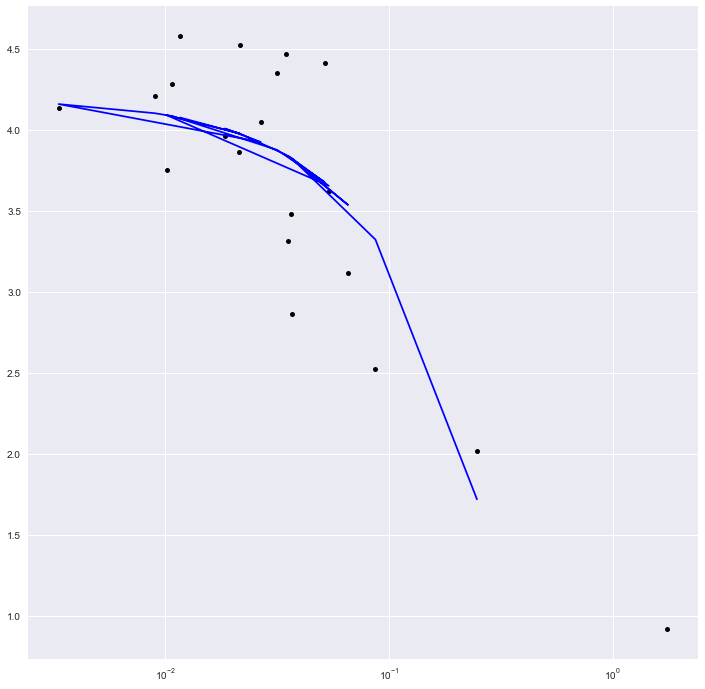

In [40]:
plt.figure(figsize = (12,12))
X = np.log(salinity_50)
Y = np.log(depth)
plt.plot(salinity_50,Y,'k.',markersize = 10)
#plt.plot(X,depth,'k.',markersize = 10)
plt.xscale('log')

fit_1 = np.polyfit(salinity_50[1:],Y[1:],1)
fit_1_val = np.polyval(fit_1,salinity_50[1:])

plt.plot(salinity_50[1:],fit_1_val,'b-')



In [39]:
salinity_50

array([1.75242446, 0.24701829, 0.08685114, 0.03662482, 0.06551286,
       0.03535651, 0.03630495, 0.05374684, 0.01011817, 0.02142062,
       0.0184207 , 0.02666984, 0.00333395, 0.00894398, 0.01074873,
       0.03160161, 0.05145517, 0.03462165, 0.02158992, 0.01165002])

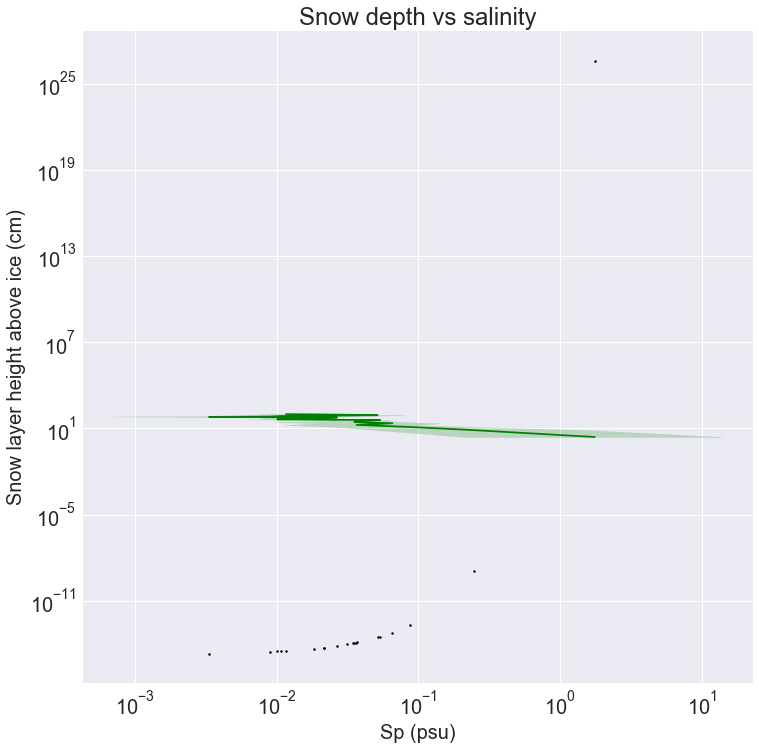

In [13]:
# fitting a polynomial function to the above curve 

Y = np.log(depth)

linear_fit = np.polyfit(salinity_50,depth,1)


a = np.exp(linear_fit[0])
b = linear_fit[1]

Y_fit = a*np.exp(b*salinity_50);
#Y_fit = np.polyval(parabolic_fit,salinity)

plt.figure(figsize = (12,12))
plt.plot(salinity_50,depth,'g')
plt.fill_betweenx(depth,salinity_25,salinity_75,alpha = 0.2,color = 'g')
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Sp (psu)',fontsize = 20)
plt.ylabel('Snow layer height above ice (cm)',fontsize = 20)
plt.title('Snow depth vs salinity',fontsize = 24)
plt.plot(salinity_50,Y_fit,'k.',markersize = 5)
plt.yscale('log')

In [21]:
depth

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5,
       57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5])

In [11]:
linear_fit

array([-34.01180068,  54.36101726])

In [8]:
lat = df.lat
lon = df.lon

sd_50 = [];
sd_25 = [];
sd_75 = [];
salinity_median = [];
salinity_25 = [];
salinity_75 = [];
snow_depth_bin = np.arange(0,81,5);

salinity = df.salinity
salinity_copy = salinity.copy()
snow_bottom = df.top

salinity_2 = salinity[salinity>0]
snow_bottom_2 = snow_bottom[salinity>0]
#figure(1)
plt.figure(figsize=(12,12))
plt.style.use('seaborn')
plt.plot(salinity_2,snow_bottom_2,'b.',markersize=20)
plt.xscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Salinity (%)',fontsize = 20)
plt.ylabel('Sample Bottom depth (cm)',fontsize = 20)
plt.grid(True)
#plt.show()

plt.figure(2)

for i in range(len(snow_depth_bin)-1):
    
    cond = (snow_bottom_2>snow_depth_bin[i]) & (snow_bottom_2<snow_depth_bin[i+1])
    
    salinity_slice = salinity_2[cond]
    if len(salinity_slice) >0:
        print('the iteration number and length of salinity slice= ', i, len(salinity_slice))
        z = np.percentile(salinity_slice,50)
        
        salinity_median = np.append(salinity_median, np.percentile(salinity_slice,50))
        snow_bottom_slice = snow_bottom_2[cond]
        sd_50 = np.append(sd_50,np.percentile(snow_bottom_slice,50))

        sd_25 = np.append(sd_25,np.percentile(snow_bottom_slice,25))
        sd_75 = np.append(sd_75,np.percentile(snow_bottom_slice,75))

        salinity_25 = np.append(salinity_25, np.percentile(salinity_slice,25))
        salinity_75 = np.append(salinity_75, np.percentile(salinity_slice,75))
        


AttributeError: 'DataFrame' object has no attribute 'lat'

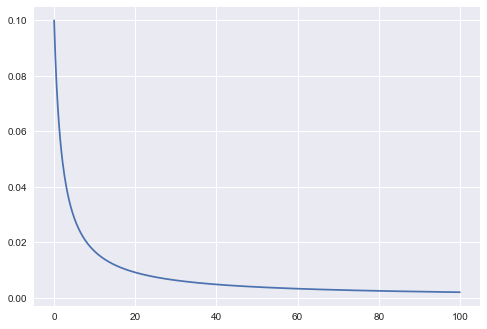

In [15]:
x_t = np.linspace(0,100,1000);
y_t = 1/(5*x_t+10);
plt.plot(x_t,y_t)

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

In [ ]:
plt.plot(salinity,snow_bottom,'r*')
plt.xscale('log')

In [ ]:
salinity_slice

In [ ]:
a = np.array([1,2,3,4,4,4,5,6])
cond = (a!=4) & (a==5)
a[cond]


In [ ]:
salinity

In [ ]:
np.mean(salinity)

In [ ]:
salinity

In [ ]:
np.shape(salinity)

In [ ]:
salinity[4]

In [ ]:
salinity = df.salinity

In [ ]:
np.min(salinity)

In [ ]:
np.mean(salinity)

In [10]:
a = 1e-3

In [11]:
a

0.001